In [1]:
# !pip install mvlearn==0.5.0 wordcloud==1.9.3 matplotlib==3.3.4 distinctipy==1.3.4 networkx==3.2.1  umap==0.1.1 hoggorm==0.13.3 adilsm==0.0.7 scipy==1.9.1
# scipy==1.12.0 not used (due to changes in SVDS) to reproduce presented results in ref paper

In [2]:
# !pip install -e ..
# !pip list

adilsm version=0.0.10
error ism before straightening:  0.13
error ism after straightening:  0.14


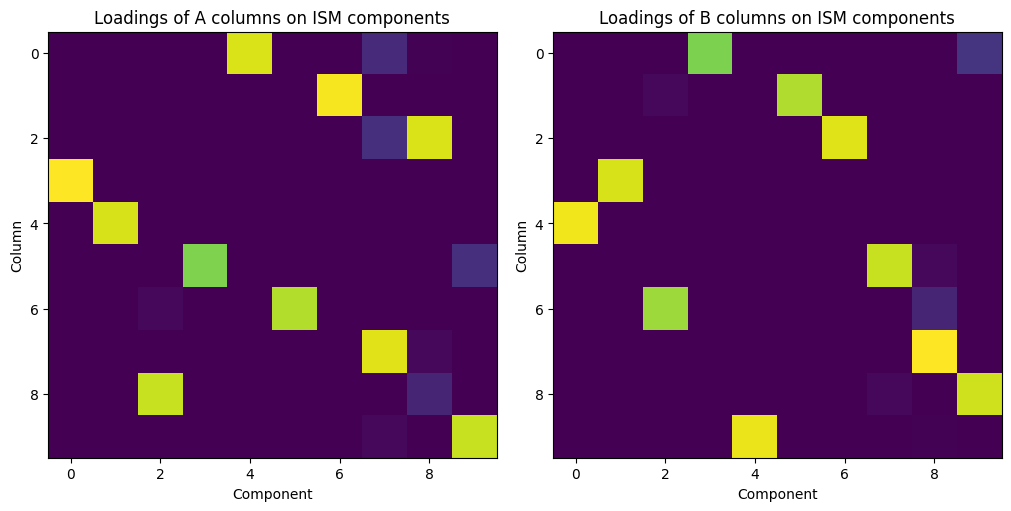

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import adilsm.adilsm as ilsm

max_noise_level = 0.1
# Generate a random non-negative matrix with 100 rows and 10 columns
A = np.random.rand(100, 10)
# Swap the columns of the A and add some noise to generate B
B = np.random.permutation(A.T).T + np.random.uniform(low=0, high=max_noise_level, size=A.shape)
# Add noise to A
A += np.random.uniform(low=0, high=max_noise_level, size=A.shape)

# ISM is expected to recognize that A and B convey the same information up to some noise,
# albeit with the columns of B swapped around. Heatmaps of the loadings of A and B columns
# on ISM components show the effective permutation. 

Xs = [A, B]
n_embedding, n_themes = [10,10]

ilsm_result = ilsm.ism(Xs, n_embedding, n_themes, norm_columns=False, update_h_ism=True,
                                    max_iter_mult=200, fast_mult_rules=True, sparsity_coeff=.8)
hv = ilsm_result['HV']
hv_sparse = ilsm_result['HV_SPARSE']
hhii = ilsm_result['HHII']
w_ism = ilsm_result['W']
h_ism = ilsm_result['H']
q_ism = ilsm_result['Q']
Xs_emb = ilsm_result['EMBEDDING']
Xs_norm = ilsm_result['NORMED_VIEWS']

fig, ax = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)
ax[0].imshow(hv[0], cmap='viridis', aspect='auto')
# Add labels and title
ax[0].set_xlabel('Component')
ax[0].set_ylabel('Column')
ax[0].set_title('Loadings of A columns on ISM components')
ax[1].imshow(hv[1], cmap='viridis', aspect='auto')
# Add labels and title
ax[1].set_xlabel('Component')
ax[1].set_ylabel('Column')
ax[1].set_title('Loadings of B columns on ISM components')

# Show the plot
plt.show()